In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [32]:
data = pd.read_csv("Veriler.csv")

In [33]:
print(data.head())

   Yaş  Oyun Sayısı Oyun Türü  İndirme Sayısı  Oyun Süresi  Ders Notu  \
0   12            5   Eğitici            1000           60         80   
1   11            2    Mantık             500           30         70   
2   14            8    Beceri            2000           90         85   
3   10            3   Eğitici             800           45         65   
4   13            6   Aksiyon            1500           75         75   

   Ebeveyn Katılımı  Test Skoru  
0                 1          85  
1                 0          75  
2                 1          90  
3                 0          70  
4                 1          80  


In [34]:
label_encoder = LabelEncoder()
data["Oyun Türü"] = label_encoder.fit_transform(data["Oyun Türü"])

In [35]:
X = data.drop("Test Skoru", axis=1)
y = data["Test Skoru"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
print("Eğitim Veri Seti MSE:", mse_train)

Eğitim Veri Seti MSE: 0.9146673443542213


In [38]:
y_test_pred = model.predict(X_test)

In [39]:
mse_test = mean_squared_error(y_test, y_test_pred)
print("Test Veri Seti MSE:", mse_test)

Test Veri Seti MSE: 1.1030177664402159


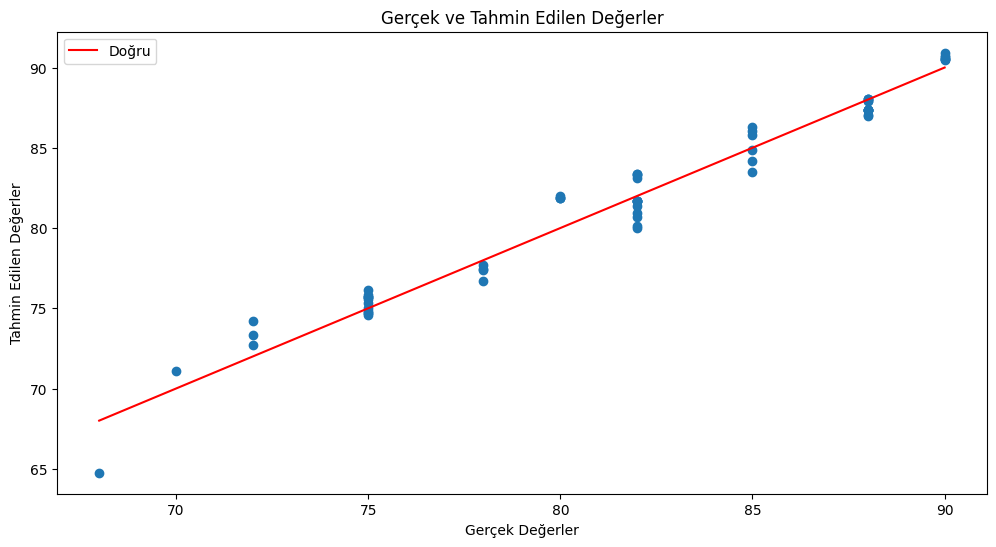

In [40]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='Doğru')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerler')
plt.legend()
plt.show()

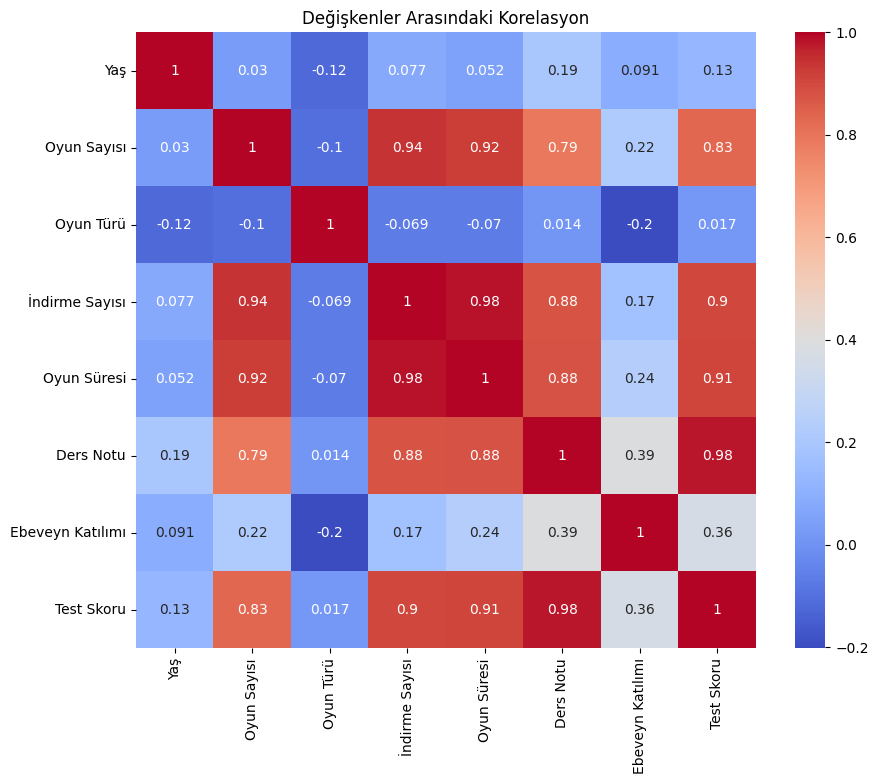

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Değişkenler Arasındaki Korelasyon')
plt.show()

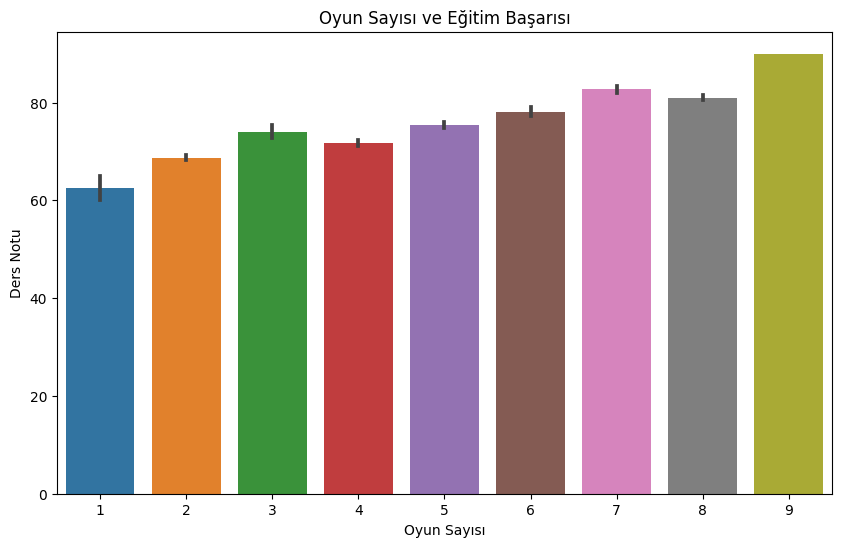

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Oyun Sayısı', y='Ders Notu', data=data)
plt.xlabel('Oyun Sayısı')
plt.ylabel('Ders Notu')
plt.title('Oyun Sayısı ve Eğitim Başarısı')
plt.show()